<a href="https://www.kaggle.com/code/kwabenaaddo/which-promotional-method-improves-sales?scriptVersionId=227877864" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# The Effect of Different Advertisement Types on Sales

### Background
This project analyzes historical marketing promotion data for a fictional business entity to evaluate the impact of various advertisement types—TV, social media, radio, and influencer promotions—on sales performance.

Each record in the dataset represents an independent marketing campaign, where different promotional channels were used to drive sales. The goal of this analysis is to identify which advertisement types have the strongest linear relationship with sales, allowing the business to optimize marketing spend and improve future sales performance. By leveraging this approach, the business can refine its marketing strategy, allocate resources more efficiently, and maximize return on investment (ROI) for future promotional campaigns.

To achieve this, the project applies Exploratory Data Analysis (EDA) and develops a Multiple Linear Regression model to estimate sales based on the most influential marketing variables.

### Project Tasks
1. Exploring and Cleaning Data – Handling missing values, identifying outliers, and ensuring data quality.
2. Variable Selection Using Visualizations & Descriptive Statistics – Identifying independent variables with the strongest correlation to sales.
3. Building and Fitting a Multiple Linear Regression Model – Estimating sales based on selected predictors.
4. Validating Model Assumptions – Checking for linearity, multicollinearity, and residual normality.
5. Interpreting Model Outputs & Communicating Results – Translating technical findings into actionable insights for non-technical stakeholders.



### Exploring and Cleaning Data

#### Import packages 

In [1]:
#import relevant python libraries and modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


#### Load, explore and clean dataset

In [2]:
#### Load dataset and save to a dataframe
data = pd.read_csv('/kaggle/input/marketing-and-sales/historial_mkt_sales_data.csv')
data.head()

,TV,Radio,Social Media,Influencer,Sales
0,Low,3.518070,2.293790,Micro,55.261284
1,Low,7.756876,2.572287,Mega,67.574904
2,High,20.348988,1.227180,Micro,272.250108
3,Medium,20.108487,2.728374,Mega,195.102176
4,High,31.653200,7.776978,Nano,273.960377


#### The variables in the data set represents: 
* TV promotional budget (in "Low," "Medium," and "High" categories)
* Social media promotional budget (in millions of dollars)
* Radio promotional budget (in millions of dollars)
* Sales (in millions of dollars)
* Influencer size (in "Mega," "Macro," "Micro," and "Nano" categories)

In [3]:
#rename one column
data = data.rename(columns = {'Social Media': 'SocialMedia'})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TV           572 non-null    object 
 1   Radio        572 non-null    float64
 2   SocialMedia  572 non-null    float64
 3   Influencer   572 non-null    object 
 4   Sales        572 non-null    float64
dtypes: float64(3), object(2)
memory usage: 22.5+ KB


In [4]:
#checking for null values as null values might impact the results of the analysis
data.isna().sum()

TV             0
Radio          0
SocialMedia    0
Influencer     0
Sales          0
dtype: int64

No null values idenfied from dataset

#### Visualize linear relationships between variables

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


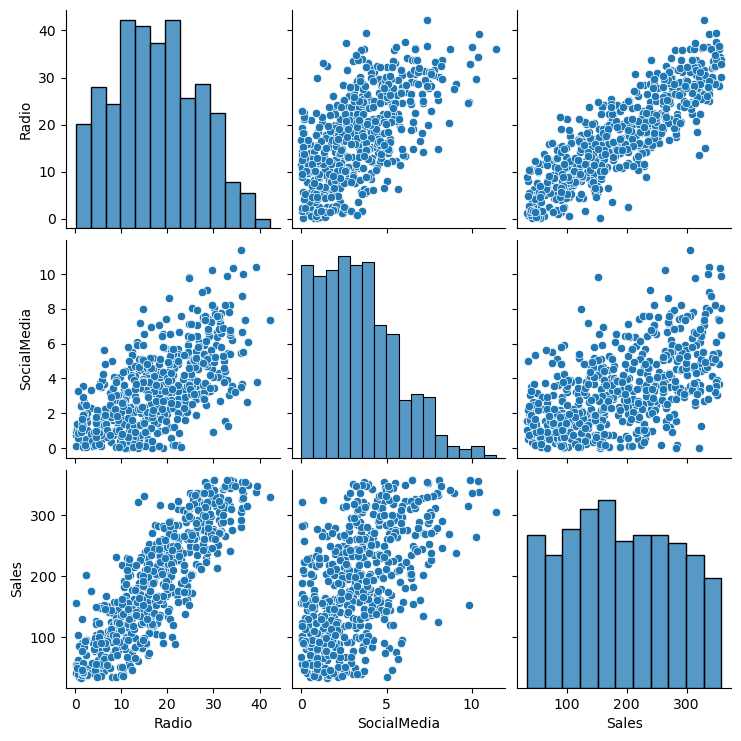

In [5]:
# scatterplot matrix to visualize the linear relationships
sns.pairplot(data)


The preceeding figure shows a strong linear relationship between Radio and Sales. Social Media and Sales are also correlated although not as strongly as Radio and Sales. Variables as TV and Influencer are not shown in the scatter because they do not have numeric values to pass to the pairplot() function

#### Estimate relationship between categorical variables and sales using mean sales per each category in the two categorical variables

In [6]:
#calculate average sales per Tv promotion
print(data.groupby('TV')['Sales'].mean())
print('')
#calculate average sales per Influencer promotion
print(data.groupby('Influencer')['Sales'].mean())

TV
High      300.853195
Low        90.984101
Medium    195.358032
Name: Sales, dtype: float64

Influencer
Macro    181.670070
Mega     194.487941
Micro    188.321846
Nano     191.874432
Name: Sales, dtype: float64


There's a pronounced relationship between TV promotion categories and sales. There seems not to be a strong correlation between Influencer categories and sales. 

From the preceeding scatterplot matrix and the average estimates in the categorical data Radio and TV have the strongest correllation yet to sales and will therefore be selected as the explanatory variables in building the regression model

# Building the model

In [7]:
#create ols formula
ols_formula = 'Sales ~ Radio + C(TV) '

#calculate ols 

OLS = ols(formula = ols_formula, data = data)

#fit OLS to model

model = OLS.fit()

#display results by calling the summary function on the model

results = model.summary()
results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1783.
Date:                Sun, 16 Mar 2025   Prob (F-statistic):          1.63e-288
Time:                        11:06:47   Log-Likelihood:                -2714.0
No. Observations:                 572   AIC:                             5436.
Df Residuals:                     568   BIC:                             5453.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         218.5261      6.261     34.902      0.000     206.228     230.824
C(TV)[T.Low]     -154.2971      4.929    -31.303      0.000    -163.979    -144.616
C(TV)[T.Medium]   -75.3120      3.624    -20.780      0.000     -82.431     -68.193
Radio               2.9669      0.212     14.015      0.000       2.551       3.383
==============================================================================
Omnibus:                       61.244   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.077
Skew:                           0.046   Prob(JB):                     0.000119
Kurtosis:                       2.134   Cond. No.                         142.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Validating the model against Multiple Linear Regression assumptions
The five assumptions to be checked at this stage include:
* Linearity: there is  lineal relation between the independent variables and the dependent variable)
* Independent observation: Each observation in the dataset is independent, i.e each row is independent of each other
* Normality: The residuals are normally distributed
* Homoscedasticity or constant variance: Fitted values and residuals are sparsely distribution,cloud-like when visualized
* No Multicollinearity: There's no linear relationship between the independent variables

### **1. Checking the Linearity assumption**

Text(0.5, 1.0, 'Social Media and Sales')

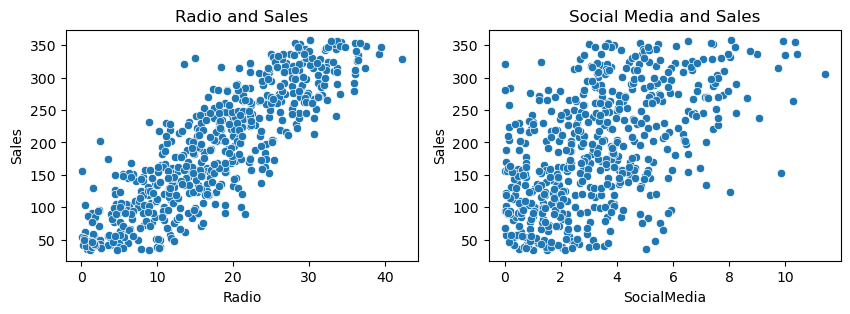

In [8]:
#Confirming linear relationship between the dependent variable (sale) and independent variables (Radio)

#check linear relationship between Sales versus Radio and sales using 1 x 2 plot

fig, axes = plt.subplots(1,2, figsize = (10, 3))

#use scatterplot to show linear relation between sales and radio
sns.scatterplot(data = data,
                x = 'Radio',
               y = 'Sales',
               ax = axes[0] )
axes[0].set_title('Radio and Sales')

#use scatterplot to show linear relation between sales and Social Media
sns.scatterplot(data = data,
                x = 'SocialMedia',
               y = 'Sales',
               ax = axes[1] )
axes[1].set_title('Social Media and Sales')



The linearity assumption holds for Radio radio promotion, as there is a clear linear relationship in the scatterplot between Radio and Sales. Social Media advertisements has not been included in the preceding multiple linear regression model, but it does appear to have some linear relationship with Sales.

### 2. **Checking the Independent observations assumption**
The *independent observation assumption* states that each observation in the dataset is independent. As each marketing promotion (i.e., row) is independent from one another, the independence assumption is not violated.

### **3. Checking the Normality assumption**

#### A Histogram and qq-plot is used here to check for normality

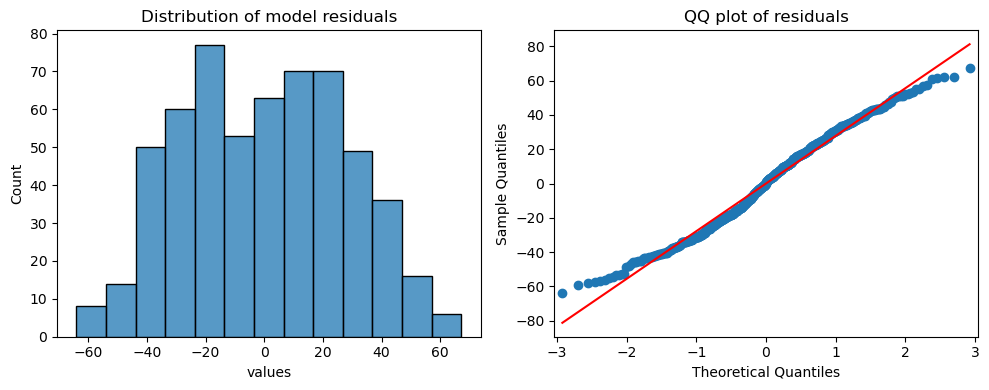

In [9]:
#histogram of residuals

residuals = model.resid

# A 1 x 2 plot is used to display the two plots on a single axes
fig, axes = plt.subplots(1,2, figsize = (10,4))

#create histogram of residuals 
sns.histplot(residuals, ax = axes[0])
axes[0].set_title('Distribution of model residuals')
axes[0].set_xlabel('values')

#quantile quantile plot to further test for normality
sm.qqplot(residuals, line = 's', ax=axes[1])
axes[1].set_title('QQ plot of residuals')

plt.tight_layout()



The residuals are normally distributed based on the histogram and the qq-plot 

### **4. Checking the Homoscedasticity assumption**

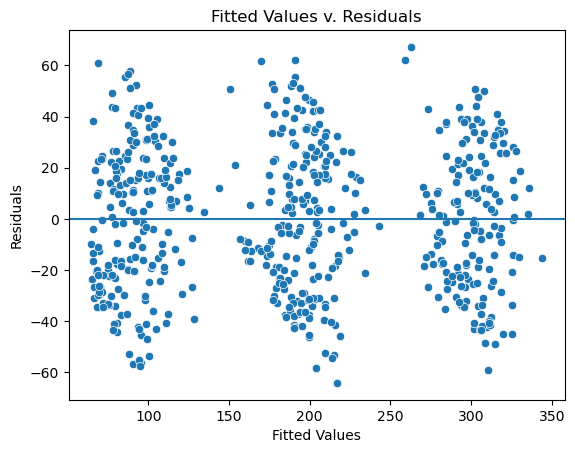

In [10]:
# Check with scatterplot with the fitted values from the model and the residuals.

fig = sns.scatterplot(x = model.fittedvalues, y = residuals)

# x axis label.
fig.set_xlabel("Fitted Values")

# y axis label.
fig.set_ylabel("Residuals")

# Set the title.
fig.set_title("Fitted Values v. Residuals")

# A horizontal line at y = 0 will visualize the variance of residuals above and below 0.
fig.axhline(0)

plt.show()

The fitted values  being in three groups is indicative of the dominance of categorical variable, this means that TV is the biggest factor that decides the sales. Regardless, variance where there are fitted values is similarly distributed, and indicates that the assumption is met.

#### **5. Checking for Multicollinearity assumption (No two independent variables should be highly linearly correlated)**

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


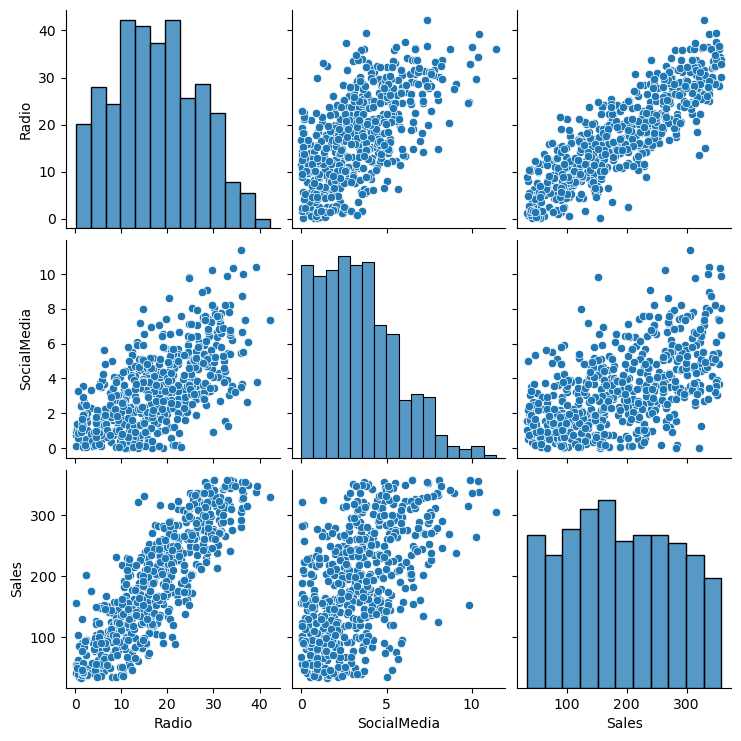

In [11]:
#checking for multicollinearity with scatterplot matrix
sns.pairplot(data)

The model utilizes only one continous independent variable, hence no multicolinearity issues  

## Results and Conclusions

### Ordinary Least Squares Regression Results

The model assumptions provide an assurance that the independent variable will accurately predict the dependent variables. If the assumptions are not violated, the model can can interpreted accurately as detailed below:

In [12]:
#bring the model results back in view
results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1783.
Date:                Sun, 16 Mar 2025   Prob (F-statistic):          1.63e-288
Time:                        11:06:47   Log-Likelihood:                -2714.0
No. Observations:                 572   AIC:                             5436.
Df Residuals:                     568   BIC:                             5453.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         218.5261      6.261     34.902      0.000     206.228     230.824
C(TV)[T.Low]     -154.2971      4.929    -31.303      0.000    -163.979    -144.616
C(TV)[T.Medium]   -75.3120      3.624    -20.780      0.000     -82.431     -68.193
Radio               2.9669      0.212     14.015      0.000       2.551       3.383
==============================================================================
Omnibus:                       61.244   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.077
Skew:                           0.046   Prob(JB):                     0.000119
Kurtosis:                       2.134   Cond. No.                         142.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Model Co-efficients
When `TV` and `Radio` are used to predict `Sales`, the model coefficients are:

* $\beta_{0} =  218.5261$
* $\beta_{TVLow}= -154.2971$
* $\beta_{TVMedium} = -75.3120$
* $\beta_{Radio} =  2.9669$

#### Interpretation of Co-efficients

The default **TV** category for the model is **High** this is because there are coefficients for the other two **TV** categories, **Medium** and **Low**. Because the coefficients for the **Medium** and **Low** `TV` categories are negative, that means the average of sales is lower for **Medium** or **Low** `TV` categories compared to the **High** `TV`  category when **Radio** is held constant.

For example, the model predicts that a **Low** `TV` promotion is 154.2971 lower on average compared to a **high**`TV` promotion given the same `Radio` promotion.

The coefficient for `Radio` is positive, and affirms the positive linear relationship discovered in the exploratory data analysis.

Again, the p-value for all coefficients is $0.000$, this implies all coefficients are statistically significant at $5\%$ significance level.  

For example, there is a $95\%$ chance that the interval $[-163.979,-144.616]$ contains the true parameter of the slope of $\beta_{TVLow}$, which is the estimated difference in promotion sales when a `Low` `TV` promotion is chosen instead of a `High` `TV` promotion.


### Insights worth sharing
**Findings for Technical Stakeholders**

Per the model, high TV promotional budgets results in significant more sales than medium and low TV promotional budgets. E.g., the model suggests that a `Low` `TV` promotion is 154.2971 lesser on average than a `high` `TV` promotion holding `Radio` promotion constant.

The coefficient for second independent variable `Radio` is positive. It affirms the positive linear relationship earlier depicted in the EDA.

The p-value for all coefficients is $0.000$, meaning all coefficients are statistically significant at $p=0.05$.  

For example, there is a $95\%$ chance the interval $[-163.979,-144.616]$ contains the true parameter of the slope of $\beta_{TVLow}$, which is the estimated difference in promotion sales when a low TV promotional budget is chosen instead of a high TV promotion budget.


**Findings to Non - Technical stakeholders**

High TV promotional budgets have a substantial positive influence on sales. The model estimates that switching from a high to medium TV promotional budget reduces sales by $\$75.3120$ million (95% CI $[-82.431,-68.193])$, and switching from a high to low TV promotional budget reduces sales by $\$154.297$ million (95% CI $[-163.979,-144.616])$. The model also estimates that an increase of $\$1$ million in the radio promotional budget will yield a $\$2.9669$ million increase in sales (95% CI $[2.551,3.383]$).

Thus, it is recommended that the business allot a high promotional budget to TV when possible and invest in radio promotions to increase sales. 
